# Functions

## Cost Functions
cost function -> mean squared error -> minimise it

m (gradient) and b (y intercept)

How can we minimise the cost function?
1. find the partial derivative of the cost with respect to gradient (partial_derivative_m)
2. find the partial derivative of the gradient with respect to y intercept (partial_derivative_b)

With each iteration, we will find the gradient and y intercept and then update them.
m = m - learning_rate * partial_derivative_m
b = b - learning_rate * partial_derivative_b

The reason why we subtract is beecuase the partial derivative is the direction of the steepest descent. Hence we want to move in the opposite direction.
The learning rate refers to the size of the steps we take.

<AxesSubplot:xlabel='floor_area_sqm', ylabel='resale_price'>

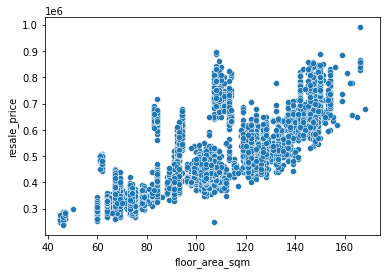

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_url = 'https://www.dropbox.com/s/jz8ck0obu9u1rng/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv?raw=1'
df = pd.read_csv(file_url)
df_tampines = df.loc[df['town'] == 'TAMPINES',:]
sns.scatterplot(y='resale_price', x='floor_area_sqm', data=df_tampines)

In [4]:

def standard_scaling(df):
    return df.apply(lambda x: (x - np.mean(x)) / np.std(x))

def min_max_scaling(df):
    return df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

def normalization(df):
    return df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))

def train_test_split(df_feature, df_target, random_state=None, test_size=0.5):
    np.random.seed(random_state)
    N = df_feature.shape[0]
    print(N)
    sample = int(test_size*N)
    train_idx = np.random.choice(N, sample,replace=False)
    print(len(train_idx))
    
    df_feature_train = df_feature.iloc[train_idx]
    df_target_train = df_target.iloc[train_idx]

    test_idx = [idx for idx in range(N) if idx not in train_idx]
    print(len(test_idx))
    
    df_feature_test = df_feature.iloc[test_idx]
    df_target_test = df_target.iloc[test_idx]

    return df_feature_train, df_feature_test, df_target_train, df_target_test

In [5]:
# Cost Function

def cost_function(X, y, w, b):
    """
    Parameters:
    X: features
    y: target values
    w: weights
    b: bias
    
    Returns:
    cost: cost with current weights and bias
    """
    cost = np.sum((((X.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost


In [6]:

# gradient descent function to perform the feed-forward propagation, backpropagation, calculate the gradient and update our weights.
def gradient_descent_function(X, y, w, b, alpha=0.01, epochs=1000):
    """
    Parameters:
    X: features
    y: target values
    w: initial weights
    b: initial bias
    alpha: learning rate
    epochs: number of iterations
    
    Returns:
    costs: cost per epoch
    w: finalised weights
    b: finalised bias
    """
    m = len(y)
    costs = [0] * epochs
    
    for epoch in range(epochs):
        # Calculate the value -- Forward Propagation
        z = X.dot(w) + b
        
        # Calculate the losses
        loss = z - y
        
        # Calculate gradient descent
        weight_gradient = X.T.dot(loss) / m
        bias_gradient = np.sum(loss) / m
        
        # Update weights and bias
        w = w - alpha*weight_gradient
        b = b - alpha*bias_gradient
        
        # Store current lost
        cost = cost_function(X, y, w, b)
        costs[epoch] = cost
        
    return w, b, costs


In [7]:
train = pd.read_csv("./train_data.csv")
test = pd.read_csv("./test_data.csv")
train.drop(['Unnamed: 0','id'], axis=1,inplace=True)
test.drop(['Unnamed: 0','id'], axis=1,inplace=True))

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,3,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,12.247694
1,1,2,20,3,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,12.109011
2,2,3,60,3,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,12.317167
3,3,4,70,3,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,11.849398
4,4,5,60,3,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,12.429216


In [ ]:

# Seperate features and target variable
X = df.iloc[:, 2:6]
y = df.loc[:,'Deaths per day']

# Dividing the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.45)